**Тема “Обучение без учителя”**

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
    
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [23]:
from sklearn.datasets import load_boston

In [24]:
boston = load_boston()

In [25]:
data = boston.data

In [26]:
feature_names = boston.feature_names

In [27]:
X = pd.DataFrame(data, columns=feature_names)

In [28]:
y = pd.DataFrame(boston.target, columns=['Price'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train_scaled = scaler.fit_transform(X_train)

In [33]:
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [36]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [38]:
X_train_tsne.shape

(404, 2)

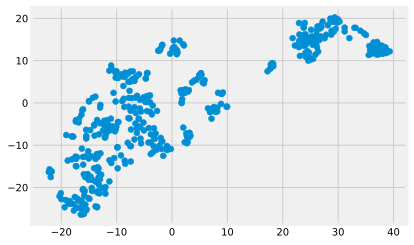

In [39]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [83]:
from sklearn.cluster import KMeans

In [87]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
X_train_tsne_scaled = scaler.fit_transform(X_train_tsne)

In [91]:
X_train_tsne_scaled

array([[0.81841993, 0.96014535],
       [0.20248796, 0.46884158],
       [0.10649866, 0.18989432],
       [0.97737026, 0.85596377],
       [0.21871607, 0.65177524],
       [0.1342321 , 0.39963862],
       [0.16716018, 0.40576023],
       [0.05763566, 0.05545485],
       [0.98940444, 0.83539164],
       [0.9385438 , 0.80901545],
       [0.16560924, 0.39204323],
       [0.26819253, 0.4413304 ],
       [0.32848945, 0.38845453],
       [0.9422406 , 0.8338361 ],
       [0.32411778, 0.34909964],
       [0.19530948, 0.71918285],
       [0.24348816, 0.59038365],
       [0.12751134, 0.17545131],
       [0.14478776, 0.3067439 ],
       [0.0826211 , 0.29069376],
       [0.9140773 , 0.9319401 ],
       [0.2895803 , 0.5708784 ],
       [0.10971344, 0.39649415],
       [0.18709421, 0.44771957],
       [0.06355739, 0.05489081],
       [0.31126696, 0.38398206],
       [0.4962191 , 0.61743075],
       [0.33568406, 0.29766893],
       [0.33299163, 0.86085963],
       [0.07172745, 0.39452952],
       [0.

In [92]:
X_train_tsne_scaled = pd.DataFrame(X_train_tsne_scaled, columns = ['x', 'y'])

In [93]:
X_train_tsne_labels = model.fit_predict(X_train_tsne_scaled)

Text(-10, -25, 'Кластер 0')

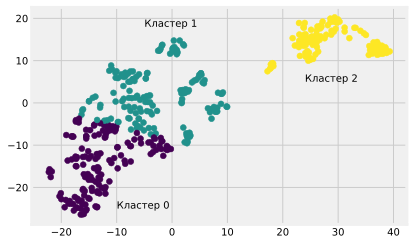

In [94]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_tsne_labels)
plt.text(24, 5, 'Кластер 2')
plt.text(-5, 18, 'Кластер 1')
plt.text(-10, -25, 'Кластер 0')

In [95]:
y_train[X_train_tsne_labels==0].mean()

Price    27.736486
dtype: float64

In [96]:
y_train[X_train_tsne_labels==1].mean()

Price    22.327742
dtype: float64

In [97]:
y_train[X_train_tsne_labels==2].mean()

Price    16.277228
dtype: float64

In [98]:
X_train.loc[X_train_tsne_labels==0, 'CRIM'].mean()

0.11004972972972978

In [99]:
X_train.loc[X_train_tsne_labels==1, 'CRIM'].mean()

0.7137870322580645

In [100]:
X_train.loc[X_train_tsne_labels==2, 'CRIM'].mean()

13.17982178217822

*** Задание 3**

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.